## Football!

A Jupyter notebook where I can try out a few data visualisations. I found a bundesliga dataset on Kaggle (https://www.kaggle.com/datasets/oles04/bundesliga-seasons) with data from football seasons 05/06 to 22/23. Honestly, I'm not a football fan, but I do enjoy sports, and this gives a fairly straight forwards dataset to analyse: How many goals were scored, who won, away vs home goals etc. Maybe using this we could do some ML work, based on previous games between two teams? Frankly, this is a small dataset so the value of any sort of analysis would be limited compared to a simple regression analysis. A Poisson model might do the trick, may be worth looking into how to do that programatically... 

Anyway, first we will do the following things: 
- Load the csv into a df 
- Take a tertiary glance at this data to know what we're working with
- Clean up the dataset to a state I want to work with it

After this, the task will be 'simple' 
- Analyse each relevant column, to find any trends
- Select some columns to do some bivariate analysis
- Make some pretty (and probably some not so pretty) graphs to show the data using seaborn and matplotlib

Finally, we'll look at some stretch goals
- Is there any ML we could practise on this? 
- Can we do any statistical analysis to predict who'll win the 23/24 season? 

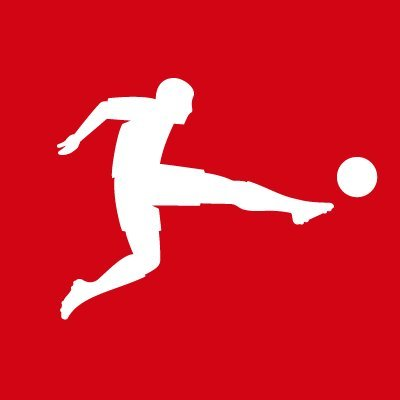

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

Change our CSV to a dataframe, then have a little peek inside... 

In [3]:
bundesliga_df = pd.read_csv('bulidata.csv')
head = (bundesliga_df.head())
describe = (bundesliga_df.describe())

They make a bit of a mess if they're opened (22 columns, and poor jupyter notebook formatting for that!) so I'll leave them as variables for the time being. Whoever you are reading this, just imagine what it will look like. Or, just look at the csv in this repo ¯\_(ツ)_/¯

Anyway, on this I can see a few less than useful columns that are clogging things up: 

- Index: this is something Kaggle added, I don't think I need this for my purposes
- League name: Bit pointless given other columns. 
- League: they're all in bl1. I don't think we need to analyse this much, there's one result... 
- Finished: They all finished their games, no need for a column with the same values
- Matchday: Am I interested in this? It can be worked out from the match date column, seems pointless. 
- Home team/ Home Icon: Given we have the full name of the home team, I don't think these are needed. 
- Away team/ Away Icon: As above, so below
- Draw/ Win_home/ Win_away: I think these can be amalgamated into a single column: result. Could use a simple function of goals home vs goals away to work out who won, and if it was a home or away win. 

So that's at least 12 of the columns that can be removed/amalgamated. Assuming that leaves 1 in this little lot, 23 columns, -12 columns, +1 column = a total of 12 columns, which is much more manageable. Further, there are a couple of columns I would like to add: 

- Match week: what week of the season is the match being played? Allows us to analyse for if the last week is a massive goal fest and it's worth staying upfor, or if there are weeks that are total snoozefests. 
- Match_date and match_time: I think these are worth splitting, to make it a bit clearer what happened when. 

So that means a total of 14 columns (at time of writing). Let's get to it! 

In [39]:
temp_df = bundesliga_df[["MATCH_DATE","SEASON","LOCATION","MATCHDAY_NR","HOME_TEAM_ID","HOME_TEAM","AWAY_TEAM_ID","AWAY_TEAM","GOALS_HOME","GOALS_AWAY"]]


def get_winner(df_row):
    if df_row['GOALS_HOME'] > df_row['GOALS_AWAY']:
        return "Home_win"
    elif df_row['GOALS_HOME'] < df_row['GOALS_AWAY']:
        return "Away_win"
    else:
        return "Draw"

temp_df["RESULT"] = temp_df.apply(get_winner, axis = 1)

temp_df['MATCH_TIME'] = temp_df['MATCH_DATE'].str[11:]
temp_df['MATCH_DATE'] = temp_df['MATCH_DATE'].str[:10]
temp_df = temp_df.rename(columns={"MATCHDAY_NR": "MATCH_WEEK_NUMBER"})
temp_df = temp_df.rename(str.lower, axis='columns')
analysis_df = temp_df[["season","location","match_week_number","home_team_id","home_team","away_team_id","away_team","goals_home","goals_away","result","match_date","match_time"]]

print (analysis_df.head())

   season   location  match_week_number  home_team_id  home_team  \
0    2005    München                  1            40     Bayern   
1    2005       Köln                  1            65       Köln   
2    2005   Duisburg                  1           107   Duisburg   
3    2005    Hamburg                  1           100        HSV   
4    2005  Wolfsburg                  1           131  Wolfsburg   

   away_team_id  away_team  goals_home  goals_away    result  match_date  \
0            87   Gladbach           3           0  Home_win  2005-08-05   
1            81      Mainz           1           0  Home_win  2005-08-06   
2            16  Stuttgart           1           1      Draw  2005-08-06   
3            79   Nürnberg           3           0  Home_win  2005-08-06   
4             7        BVB           2           2      Draw  2005-08-06   

  match_time  
0   20:30:00  
1   15:30:00  
2   15:30:00  
3   15:30:00  
4   15:30:00  


C:\Users\Gordon\AppData\Local\Temp\ipykernel_8044\3150477399.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["RESULT"] = temp_df.apply(get_winner, axis = 1)
C:\Users\Gordon\AppData\Local\Temp\ipykernel_8044\3150477399.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['MATCH_TIME'] = temp_df['MATCH_DATE'].str[11:]
C:\Users\Gordon\AppData\Local\Temp\ipykernel_8044\3150477399.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

Well, there seem to be a few warnings associated with my functions, but my thinking is that it's working? One to come back to if needed, but a quick look through the data shows to me that everything has worked... 

Anyway, the dataframe is ready now: We've removed some rows, added some in, renamed them to lower case, and finally reorderd them in an order that makes sense. First will be some basic investigations: 

- In the continuous values, what does the data look like
- Let's make some pretty graphs for individual columns at a time. 
- After that, we'll start comparing some. 